# Generating Dataset

In [38]:
import random
X = []
for value in range(1000):
    n = random.randint(0, 1000)
    X.append(n)

In [39]:
y = []
for x in X:
    result = 5*x + 3
    y.append(result)

## Noice creation

In [40]:
#Creating random value for noice
noice_index = [random.randrange(0,15,1) for i in range(15)]

# #random value list for index
index_list = [random.randrange(0,15,1) for i in range(15)]

# #subtracting noice value from y
for ind in index_list:
    y[ind] = y[ind] - noice_index[ind]

## Adding Outlier (Don't run before looking at graph at the end)

In [52]:
index_list = [random.randrange(0,100,1) for i in range(5)]

outlier_list = [5000,0.003, 4500, 3655, 1050]
for ind in range(len(index_list)):
    y[index_list[ind]] = outlier_list[ind]

## DataFrame

In [41]:
import pandas as pd
data = pd.DataFrame({"X": X, "y": y})

In [42]:
data

X     y
0     64   319
1    509  2548
2    433  2168
3    505  2515
4    579  2883
..   ...   ...
995   73   368
996  890  4453
997  884  4423
998  471  2358
999  774  3873

[1000 rows x 2 columns]

In [43]:
#seperating independent and dependent variables
x = data.drop(['y'], axis=1)
y = data['y']
x.shape, y.shape

((1000, 1), (1000,))

In [44]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

## Linear regression

In [45]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
import time

In [46]:
# Creating instance of Linear Regresssion
lr = LR()
start_time = time.time()
# Fitting the model
lr.fit(train_x, train_y)
end_time = time.time()
lr_training_time = end_time - start_time
print("Training time in seconds: ", lr_training_time)

Training time in seconds:  0.017560720443725586


In [47]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 0.19533915989058936


In [48]:
# Predicting over the Test Set and calculating error
test_predict_linear_regression = lr.predict(test_x)
k = mae(test_predict_linear_regression, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     0.10059922959147512


In [49]:
# lr.score(test_predict_linear_regression, test_y)
linear_regression_score = lr.score(test_x, test_y)
linear_regression_score

0.9999999933031769

In [50]:
lr.coef_

array([4.99980408])

In [51]:
lr.intercept_

2.9964105704061694

## Decision Tree

In [52]:
#Decision tree 
from sklearn.tree import DecisionTreeRegressor
DecisionTree_regr = DecisionTreeRegressor(max_depth=2)

In [53]:
start_time = time.time()
DecisionTree_regr.fit(train_x, train_y)
end_time = time.time()
Desiontree_training_time = end_time - start_time
print("Training time in seconds: ", Desiontree_training_time)

Training time in seconds:  0.0030808448791503906


In [54]:
test_prediction_decision_tree = DecisionTree_regr.predict(test_x)

In [55]:
Desicion_tree_score = DecisionTree_regr.score(test_x, test_y)
Desicion_tree_score

0.9333053243367148

# Random Forest 

In [67]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
RF_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
start_time = time.time()
RF_regressor.fit(x, y)
end_time = time.time()
RF_training_time = end_time - start_time
print("Training time in seconds: ", RF_training_time)

Training time in seconds:  0.2327098846435547


In [70]:
RF_pridiction = RF_regressor.predict(test_x)
# RF_pridiction

In [71]:
RF_score = RF_regressor.score(test_x, test_y)
RF_score

0.9999993377899012

# KNN

In [74]:
from sklearn import neighbors

K=2
knn_regr = neighbors.KNeighborsRegressor(n_neighbors=K)

start_time = time.time()
knn_regr.fit(train_x, train_y)
end_time = time.time()
knn_training_time = end_time - start_time
print("Training time in seconds: ", knn_training_time)

Training time in seconds:  0.005166530609130859


In [77]:
knn_predict = knn_regr.predict(test_x)
# knn_predict

In [81]:
knn_score = knn_regr.score(test_x, test_y)
knn_score

0.9999889582434307

# SVM

In [186]:
from sklearn.svm import SVR
svm_regressor = SVR(C=1.0, epsilon=0.2, kernel = 'linear')

start_time = time.time()
svm_regressor.fit(train_x, train_y)
end_time = time.time()
SVM_training_time = end_time - start_time
print("Training time in seconds: ", SVM_training_time)

Training time in seconds:  1.6460542678833008


In [201]:
svm_prediction = svm_regressor.predict(test_x)
# svm_prediction

In [202]:
svm_score = svm_regressor.score(test_x, test_y)
svm_score

0.9999999795995259

# Bayesian Regression

In [189]:
from sklearn.linear_model import BayesianRidge
Bayesian_model = BayesianRidge()

start_time = time.time()
Bayesian_model.fit(train_x, train_y)
end_time = time.time()
Bayesian_training_time = end_time - start_time
print("Training time in seconds: ", Bayesian_training_time)

Training time in seconds:  0.571115255355835


In [190]:
Bayesian_prediction = Bayesian_model.predict(test_x)
# Bayesian_prediction

In [191]:
Bayesian_score = Bayesian_model.score(test_x, test_y)
Bayesian_score

0.9999999933030492

# Ridge regression

In [192]:
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha=0.05, normalize=True)

start_time = time.time()
ridge_regression.fit(train_x,train_y)
end_time = time.time()
ridge_training_time = end_time - start_time
print("Training time in seconds: ", ridge_training_time)

Training time in seconds:  0.11894869804382324


In [193]:
ridge_prediction = ridge_regression.predict(test_x)
# Bayesian_prediction

In [194]:
ridge_score = ridge_regression.score(test_x, test_y)
ridge_score

0.9977258117480858

# Lasso Regression 

In [195]:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha=0.3, normalize=True)

start_time = time.time()
lasso_regression.fit(train_x,train_y)
end_time = time.time()
lasso_training_time = end_time - start_time
print("Training time in seconds: ", lasso_training_time)

Training time in seconds:  0.1092374324798584


In [196]:
lasso_predction = lasso_regression.predict(test_x)
# Bayesian_prediction

In [197]:
lasso_score = lasso_regression.score(test_x, test_y)
lasso_score

0.9999656812065297

## Plot for each algorithm result on test prediction

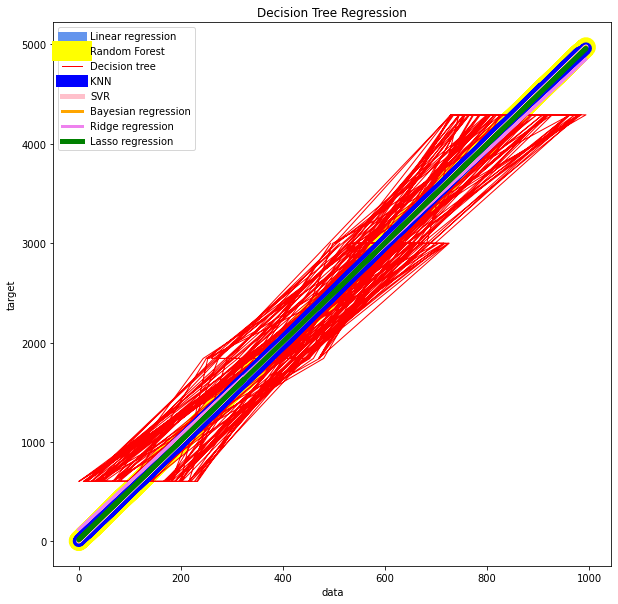

In [204]:
# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
# plt.scatter(x, y, s=20, edgecolor="black",
#             c="darkorange", label="data")
plt.plot(test_x, test_predict_linear_regression, color="cornflowerblue",
         label="Linear regression", linewidth=9)
plt.plot(test_x, RF_pridiction, color="yellow", label="Random Forest", linewidth=20)
plt.plot(test_x, test_prediction_decision_tree, color="red", label="Decision tree", linewidth=1)
plt.plot(test_x, knn_predict, color="blue", label="KNN", linewidth=12)
plt.plot(test_x, svm_prediction, color="pink", label="SVR", linewidth=5)
plt.plot(test_x, Bayesian_prediction, color="orange", label="Bayesian regression", linewidth=3)
plt.plot(test_x, ridge_prediction, color="violet", label="Ridge regression", linewidth=3)
plt.plot(test_x, lasso_predction, color="green", label="Lasso regression", linewidth=5)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Outliers for Gausiian Naive Bayes make worst prediction. However, Linear regression and Decision tree regression can make base prediction for outliers. In-order to get more accurate prediction,we might need to remove outlier and make proper pre-processing before modelling.  

## Training time

In [176]:
import numpy as np
time_list = [lr_training_time, RF_training_time, Desiontree_training_time, knn_training_time, SVM_training_time, Bayesian_training_time, ridge_training_time, lasso_training_time]
x = np.arange(8)
plt.figure(figsize=(10,10))
plt.bar(x, time_list)
plt.xticks(x, ['Linear', "RandomF", "Decision Tree", "KNN", "SVM", "BayesianR", "Ridge", "Lasso"])

([<matplotlib.axis.XTick at 0x7f21832090b8>,
 [Text(0, 0, 'Linear'),
  Text(0, 0, 'RandomF'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'KNN'),
  Text(0, 0, 'SVM'),
  Text(0, 0, 'BayesianR'),
  Text(0, 0, 'Ridge'),
  Text(0, 0, 'Lasso')])

# Plotting score for algorithms

In [214]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0,0,1,1])
langs = ['Linear regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVR', "BayesianR", "ridgeR", "lasso"]
students = [linear_regression_score,Desicion_tree_score, RF_score, knn_score,svm_score, Bayesian_score, ridge_score, lasso_score]
ax.bar(langs,students)
plt.show()